In [1]:
import pandas as pd
import os
from enum import Enum
from typing import List

class MovieDataLoader:
    def __init__(self, file_path: str):
        self.file_path = file_path
        self.extension = os.path.splitext(file_path)[1]
        self.dataframe = None

    def load(self) -> pd.DataFrame:
        self.dataframe = pd.read_csv(
            self.file_path,
            sep='\t' if self.extension == '.txt' else ','
        )
        return self.dataframe

class DB(Enum):
    CASTINGS = 0
    COUNTRIES = 1
    GENRES = 2
    RATES = 3
    MOVIES = 4
    PEOPLES = 5

def get_dataframes() -> List[pd.DataFrame]:
    base_path = os.path.join(
        os.getcwd(),
        "data/kmrd/kmr_dataset/datafile/kmrd-small"
    )
    db_name = ["castings.csv", "countries.csv", "genres.csv", "rates.csv", "movies.txt", "peoples.txt"]
    db_paths = [os.path.join(base_path, name) for name in db_name]
    return [MovieDataLoader(path).load() for path in db_paths]

In [2]:
dataframes = get_dataframes()
castings_df = dataframes[DB.CASTINGS.value]
countries_df = dataframes[DB.COUNTRIES.value]
genres_df = dataframes[DB.GENRES.value]
rates_df = dataframes[DB.RATES.value]
movies_df = dataframes[DB.MOVIES.value]
peoples_df = dataframes[DB.PEOPLES.value]

print("castings_df")
print(castings_df.head())
print("countries_df")
print(countries_df.head())
print("genres_df")
print(genres_df.head())

castings_df
   movie  people  order  leading
0  10001    4374      1        1
1  10001     178      2        1
2  10001    3241      3        1
3  10001   47952      4        1
4  10001   47953      5        0
countries_df
   movie country
0  10001    이탈리아
1  10001     프랑스
2  10002      미국
3  10003      미국
4  10004      미국
genres_df
   movie   genre
0  10001     드라마
1  10001  멜로/로맨스
2  10002      SF
3  10002     코미디
4  10003      SF


In [3]:
print("rates_df")
print(rates_df.head())
print("movies_df")
print(movies_df.head())
print("peoples_df")
print(peoples_df.head())

rates_df
   user  movie  rate        time
0     0  10003     7  1494128040
1     0  10004     7  1467529800
2     0  10018     9  1513344120
3     0  10021     9  1424497980
4     0  10022     7  1427627340
movies_df
   movie                 title                           title_eng    year  \
0  10001                시네마 천국              Cinema Paradiso , 1988  2013.0   
1  10002              빽 투 더 퓨쳐           Back To The Future , 1985  2015.0   
2  10003            빽 투 더 퓨쳐 2    Back To The Future Part 2 , 1989  2015.0   
3  10004            빽 투 더 퓨쳐 3  Back To The Future Part III , 1990  1990.0   
4  10005  스타워즈 에피소드 4 - 새로운 희망                    Star Wars , 1977  1997.0   

     grade  
0   전체 관람가  
1  12세 관람가  
2  12세 관람가  
3   전체 관람가  
4       PG  
peoples_df
   people    korean        original
0       5    아담 볼드윈    Adam Baldwin
1       8   애드리안 라인     Adrian Lyne
2       9     에이단 퀸     Aidan Quinn
3      13  구로사와 아키라  Akira Kurosawa
4      15     알 파치노       Al Pacino


In [4]:
from datetime import datetime

# 결측치 확인
def print_missing_values():
    print("결측치 확인:")
    print(movies_df.isnull().sum())
    print(castings_df.isnull().sum())
    print(countries_df.isnull().sum())
    print(genres_df.isnull().sum())
    print(rates_df.isnull().sum())

def remove_missing_values():
    global movies_df, peoples_df
    movies_df['year'] = pd.to_numeric(movies_df['year'], errors='coerce')
    year_median = movies_df['year'].median() if not movies_df['year'].isna().all() else 0

    # Fill missing values
    movies_df.fillna({
        'title': 'Unknown',
        'title_eng': 'Unknown',
        'year': year_median,
        'grade': "Unknown",
    }, inplace=True)

    peoples_df.fillna({
        'original': 'Unknown'
    }, inplace=True)

def remove_outliers():
    global castings_df, countries_df, genres_df, rates_df, movies_df
    current_year = datetime.now().year

    castings_df = castings_df[
        (castings_df["leading"] == 0)
        | (castings_df["leading"] == 1)
    ]
    countries_df = countries_df[
        (10000 < countries_df["movie"])
        & (countries_df["movie"] < 11000)
    ]
    genres_df = genres_df[
        (10000 < genres_df["movie"])
        & (genres_df["movie"] < 11000)
    ]
    rates_df = rates_df[
        (0 < rates_df["rate"])
        & (rates_df["rate"] <= 10)
        & (10000 < rates_df["movie"])
        & (rates_df["movie"] < 11000)
    ]
    movies_df = movies_df[
        (movies_df["year"] >= 1895)
        & (movies_df["year"] < current_year)
        & (10000 < movies_df["movie"])
        & (movies_df["movie"] < 11000)
    ]

print_missing_values()

결측치 확인:
movie          0
title          7
title_eng      8
year         390
grade         42
dtype: int64
movie      0
people     0
order      0
leading    0
dtype: int64
movie      0
country    0
dtype: int64
movie    0
genre    0
dtype: int64
user     0
movie    0
rate     0
time     0
dtype: int64


In [5]:
remove_missing_values()
print_missing_values()

결측치 확인:
movie        0
title        0
title_eng    0
year         0
grade        0
dtype: int64
movie      0
people     0
order      0
leading    0
dtype: int64
movie      0
country    0
dtype: int64
movie    0
genre    0
dtype: int64
user     0
movie    0
rate     0
time     0
dtype: int64


In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# D2Coding 폰트 경로 설정
font_path = "../D2Coding.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 폰트 설정
plt.rc("font", family=fontprop.get_name())
plt.rcParams.update({"font.size": 8})  # Set the font size to 14
plt.figure(figsize=(16, 9))


<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

country
미국            654
영국             94
한국             94
프랑스            70
홍콩             51
이탈리아           43
독일(구 서독)       20
오스트레일리아        12
대만             10
스페인             7
캐나다             6
일본              6
중국              5
스웨덴             4
러시아(구 소련)       4
남아프리카 공화국       3
폴란드             3
알제리             2
독일              2
브라질             2
보츠와나            2
핀란드             1
국가불명            1
터키              1
벨기에             1
노르웨이            1
뉴질랜드            1
그리스             1
덴마크             1
아일랜드            1
네덜란드            1
아르헨티나           1
벨라루스(구 소련)      1
유고슬라비아          1
체코              1
멕시코             1
Name: count, dtype: int64


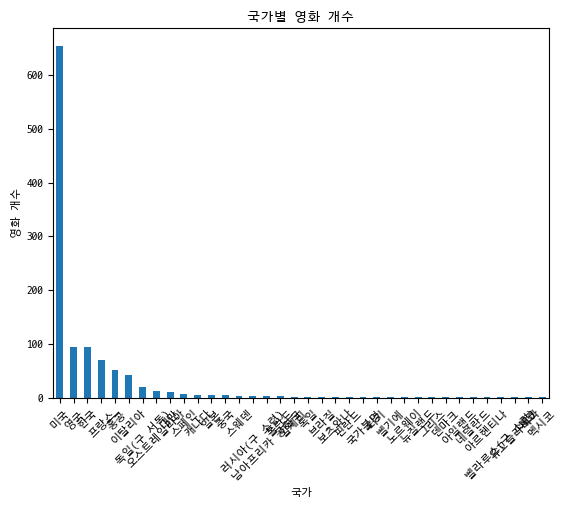

In [8]:
# 국가별 영화 개수 계산
country_counts = countries_df['country'].value_counts()
print(country_counts)

# 바 차트 그리기
country_counts.plot(kind='bar')
plt.title('국가별 영화 개수')
plt.xlabel('국가')
plt.ylabel('영화 개수')
plt.xticks(rotation=45)
plt.show()

In [14]:
# 주연 배우 필터링
leading_actors = castings_df[castings_df['leading'] == 1]
print(leading_actors.head())

# 주연 배우별 영화 출연 횟수 계산
leading_actor_counts = leading_actors['people'].value_counts()

# 가장 많은 영화에 출연한 배우의 ID
most_frequent_leading_actor_id = leading_actor_counts.idxmax()

# 배우의 이름 찾기
most_frequent_leading_actor = peoples_df[peoples_df['people'] == most_frequent_leading_actor_id]

# 결과 출력
print(f"가장 많은 영화에 주연으로 출연한 배우: {most_frequent_leading_actor["korean"].values[0]}")

    movie  people  order  leading
0   10001    4374      1        1
1   10001     178      2        1
2   10001    3241      3        1
3   10001   47952      4        1
16  10002    1076      1        1
가장 많은 영화에 주연으로 출연한 배우: 로버트 드 니로


In [16]:
# 조연 배우 필터링
supporting_actors = castings_df[castings_df['leading'] == 0]

# 조연 배우별 영화 출연 횟수 계산
supporting_actor_counts = supporting_actors['people'].value_counts()

# 가장 많은 영화에 출연한 조연 배우의 ID
most_frequent_supporting_actor_id = supporting_actor_counts.idxmax()

# 배우의 이름 찾기
most_frequent_supporting_actor = peoples_df[peoples_df['people'] == most_frequent_supporting_actor_id]
print(f"가장 많은 영화에 조연으로 출연한 배우: {most_frequent_supporting_actor["korean"].values[0]}" )

가장 많은 영화에 조연으로 출연한 배우: 우마



In [24]:
# 주연 배우 필터링
leading_actors = castings_df[castings_df['leading'] == 1]

# 주연 배우별 영화 출연 횟수 계산
leading_actor_counts = leading_actors['people'].value_counts()

# 5편 이상 출연한 배우 필터링
leading_actors_filtered = leading_actor_counts[leading_actor_counts >= 5].index
print(leading_actors_filtered)

# 5편 이상 출연한 배우의 영화 필터링
leading_movies = leading_actors[leading_actors['people'].isin(leading_actors_filtered)]

# 영화별 평점 계산
movie_ratings = rates_df.groupby('movie')['rate'].agg(['mean', 'count'])
print(movie_ratings)

# 평점이 10개 이상인 영화 필터링
filtered_movie_ratings = movie_ratings[movie_ratings['count'] >= 10]

# 평균 평점이 가장 높은 영화 찾기
top_movies = filtered_movie_ratings.sort_values(by='mean', ascending=False).head(3)
print(top_movies)

# 해당 영화의 주연 배우 찾기
top_movie_ids = top_movies.index
top_movie_actors = leading_movies[leading_movies['movie'].isin(top_movie_ids)]

# 배우의 이름 찾기
top_actors = peoples_df[peoples_df['people'].isin(top_movie_actors['people'])]

# 결과 출력
print("평균 평점이 가장 높은 영화의 주연 배우:")
print(top_actors)

Index([ 1327,  1843,   290,  1422,  1507,  1336,  1055,   535,    99,   556,
        1248,  1000,   473,  1454,   514,  1068,  1822,    15,  1945,  1994,
        1359,   635,   496,  1491,  1216,  1633,   376,   887,   430,   611,
       10649,  2466,  1833, 11039,   921,  1330,  1635,   107,  1338,  1300,
        1066,   226,  3791,  4760,   780, 11045,   881,  1098,   500,  1157,
         308,  2564,  1558,  9301,   380,  1303,   506,   652, 11044,  1501,
       16197,   838,   889,  1678,  1663,  9546,   178,  8417, 11155,  1800,
        1025,   867, 11153,  1096,   585,   357,  1247,  1508, 11047,    35,
        1205,  4779,   709,   784,  1017,  1381,  2101,   187],
      dtype='int64', name='people')
           mean  count
movie                 
10001  9.294360   3635
10002  9.416778   3004
10003  9.270981    989
10004  9.120000    700
10005  9.048619    905
...         ...    ...
10983  9.178571     56
10985  4.571429      7
10988  9.076923     13
10994  7.684211     57
10998  8